<a href="https://colab.research.google.com/github/ccasadei/corso-ia/blob/master/02Classificazione/01RegressioneLogistica/regressioneLogistica02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressione logistica
## Esercizio 2
**Author: Cristiano Casadei**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# dati caricati da https://www.openml.org/d/554
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True, as_frame=False)

# limitiamo il dataset
dataset_limit = 5000
X = X[:dataset_limit]
Y = Y[:dataset_limit]

# diamo uno sguardo ai dati di input e di output
print("Dimensioni dei dati di input:", X.shape)
print("Classi di output:", np.unique(Y))

Dimensioni dei dati di input: (5000, 784)
Classi di output: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


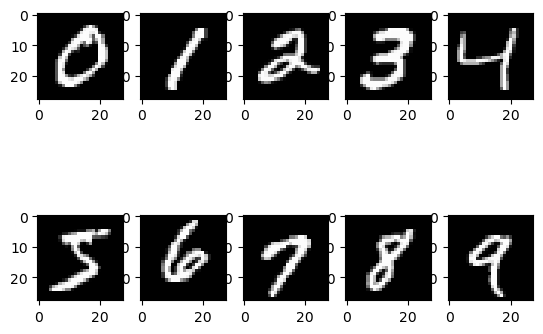

In [3]:
# visualizziamo le 10 cifre decimali per vedere come sono fatte
for i in range(0, 10):
    digit = X[Y == str(i)][0].reshape([28, 28])
    ll_plot = plt.subplot(2, 5, i + 1)
    ll_plot.imshow(digit, cmap="gray")
plt.show()

In [4]:
# eseguo la codifica automatica delle label
labEnc = LabelEncoder()
Y_enc = labEnc.fit_transform(Y)

# visualizzo le label codificate
print("Label codificate:", np.unique(Y_enc))

Label codificate: [0 1 2 3 4 5 6 7 8 9]


In [5]:
# confronto label originali con label codificate
for i in range(10):
    # prendo il primo indice di Y_enc che contiene il valore corrente di i
    indice_label = np.where(Y_enc == i)[0][0]
    # visualizzo la label originale in stessa posizione di quella codificata per un confronto
    print("Label originale:", Y[indice_label], type(Y[indice_label]),
          "- Label codificata:", Y_enc[indice_label], type(Y_enc[indice_label]))

Label originale: 0 <class 'str'> - Label codificata: 0 <class 'numpy.int64'>
Label originale: 1 <class 'str'> - Label codificata: 1 <class 'numpy.int64'>
Label originale: 2 <class 'str'> - Label codificata: 2 <class 'numpy.int64'>
Label originale: 3 <class 'str'> - Label codificata: 3 <class 'numpy.int64'>
Label originale: 4 <class 'str'> - Label codificata: 4 <class 'numpy.int64'>
Label originale: 5 <class 'str'> - Label codificata: 5 <class 'numpy.int64'>
Label originale: 6 <class 'str'> - Label codificata: 6 <class 'numpy.int64'>
Label originale: 7 <class 'str'> - Label codificata: 7 <class 'numpy.int64'>
Label originale: 8 <class 'str'> - Label codificata: 8 <class 'numpy.int64'>
Label originale: 9 <class 'str'> - Label codificata: 9 <class 'numpy.int64'>


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 427.9555555555555, 'Classi predette')

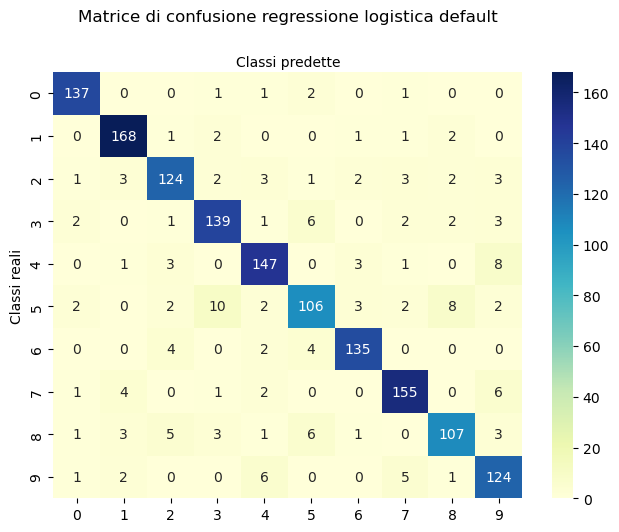

In [6]:
# divido in dataset train e test, usando un massimo di esempi per il train e di conseguenza il test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_enc, test_size=0.3, random_state=1234)

# eseguo la standardizzazione
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# eseguo una regressione logistica
logReg = LogisticRegression()
logReg.fit(X_train_std, Y_train)

# eseguo predizione e calcolo confidenza
Y_pred = logReg.predict(X_test_std)
Y_pred_proba = logReg.predict_proba(X_test_std)

cnf_matrix = confusion_matrix(Y_test, Y_pred)

# visualizzo la matrice di confusione in modo grafico
class_names = np.unique(Y_enc)
_, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice di confusione regressione logistica default', y=1.1)
plt.ylabel('Classi reali')
plt.xlabel('Classi predette')

In [7]:
# valutiamo il modello con le metriche messe a disposizione da SciKitLearn
print("Risultati regressione logistica default")
print("Accuracy:", accuracy_score(Y_test, Y_pred))
# uso il parametro average='weighted' perchè si tratta di una classificazione multiclasse
print("Precision:", precision_score(Y_test, Y_pred, average='weighted'))
print("Recall:", recall_score(Y_test, Y_pred, average='weighted'))
print("Neg. Log-Likelihood:", log_loss(Y_test, Y_pred_proba))

Risultati regressione logistica default
Accuracy: 0.8946666666666667
Precision: 0.8943709885625238
Recall: 0.8946666666666667
Neg. Log-Likelihood: 0.4955639694868003


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Text(0.5, 427.9555555555555, 'Classi predette')

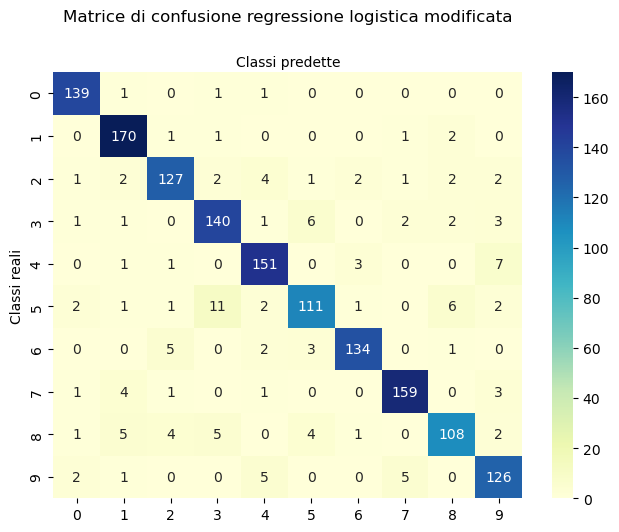

In [8]:
# ripeto modificando i parametri della regressione logistica
logReg = LogisticRegression(multi_class='multinomial',
                            penalty='l2', solver='sag')
logReg.fit(X_train_std, Y_train)

# eseguo predizione e calcolo confidenza
Y_pred = logReg.predict(X_test_std)
Y_pred_proba = logReg.predict_proba(X_test_std)

cnf_matrix = confusion_matrix(Y_test, Y_pred)

# visualizzo la matrice di confusione in modo grafico
class_names = np.unique(Y_enc)
_, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice di confusione regressione logistica modificata', y=1.1)
plt.ylabel('Classi reali')
plt.xlabel('Classi predette')

In [9]:
# valutiamo il modello con le metriche messe a disposizione da SciKitLearn
print("Risultati regressione logistica modificata")
print("Accuracy:", accuracy_score(Y_test, Y_pred))
# uso il parametro average='weighted' perchè si tratta di una classificazione multiclasse
print("Precision:", precision_score(Y_test, Y_pred, average='weighted'))
print("Recall:", recall_score(Y_test, Y_pred, average='weighted'))
print("Neg. Log-Likelihood:", log_loss(Y_test, Y_pred_proba))

Risultati regressione logistica modificata
Accuracy: 0.91
Precision: 0.9099688414154125
Recall: 0.91
Neg. Log-Likelihood: 0.32582653687352864
